# CS-559 Project: Optical Character Recognition 

### OCR dataset
This dataset contains handwritten words dataset collected by Rob Kassel at MIT Spoken Language Systems Group. I selected a "clean" subset of the words and rasterized and normalized the images of each letter. Since the first letter of each word was capitalized and the rest were lowercase, I removed the first letter and only used the lowecase letters. The tab delimited data file (letter.data.gz) contains a line for each letter, with its label, pixel values, and several additional fields listed in letter.names file. 
### Fields
id: each letter is assigned a unique integer id
letter: a-z
next_id: id for next letter in the word, -1 if last letter
word_id: each word is assigned a unique integer id (not used)
position: position of letter in the word (not used)
fold: 0-9 -- cross-validation fold
p_i_j: 0/1 -- value of pixel in row i, column j

In [1]:
import pandas as pd
import numpy as np

### Loading the dataset 

In [2]:
input_file = 'letter.data' 

f=open(input_file, 'r')
raw=f.readlines() 
pixels=[]
labels=[]
start_index = 6
end_index = -1
for i in range(len(raw)):
    data=np.array(raw[i].split('\t'))
    char=data[1]
    labels.append(char)
    pixels.append(np.array([255*float(x) for x in data[start_index:end_index]]))

pixel_df=pd.DataFrame(pixels)
pixel_df['label']=labels


In [3]:
pd.set_option('display.max_columns', 12,'display.max_rows', 6)
pixel_df

,0,1,2,3,4,5,...,123,124,125,126,127,label
0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,o
1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,m
2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52149,0.0,0.0,255.0,255.0,0.0,0.0,...,0.0,0.0,255.0,0.0,0.0,i
52150,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,a
52151,0.0,255.0,255.0,0.0,0.0,0.0,...,0.0,0.0,255.0,255.0,0.0,l


In [4]:
#unique labels
unique_labels=pixel_df.label.unique()
#print(unique_labels)


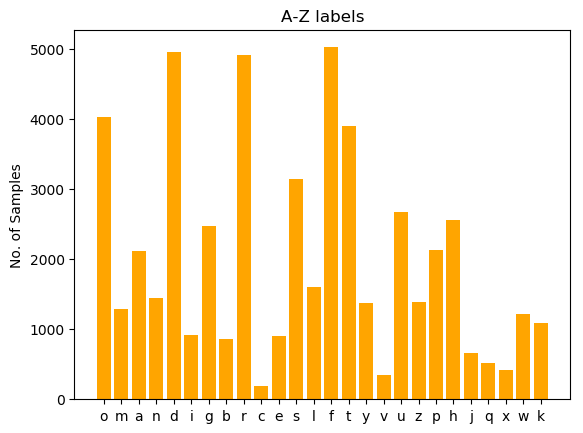

In [316]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = unique_labels
y_pos = np.arange(len(objects))
values = pixel_df.groupby('label').label.count()
 
plt.bar(y_pos, values, align='center', alpha=1,color='orange',width=.8)
plt.xticks(y_pos, objects)
plt.ylabel('No. of Samples')
plt.title('A-Z labels')
 
plt.show()


### Visualizing the images

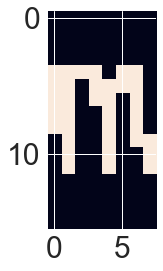

Image label is m
Press [enter] to continue.


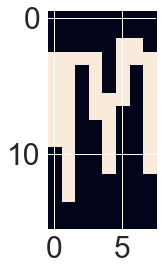

Image label is m
Press [enter] to continue.


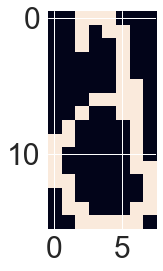

Image label is a
Press [enter] to continue.


In [315]:
import matplotlib.pyplot as plt
import time

%matplotlib inline
h, w = 16,8 # setting hieght and width of the images
if __name__ == '__main__':
    plt.ion() # turn on interactive mode
    for i in range(55,58):#change range to see more
        temp=pixels[i]
        img = np.reshape(temp, (h,w))
        plt.figure()
        plt.imshow(img)
        plt.show()
        print("Image label is {}".format(pixel_df.label[i]))
        time.sleep(1)
        _ =input("Press [enter] to continue.")#press enter three times

#### We can use smaller subset of dataset defined as Reduced_df for quick implementations. For now we will keep all the samples

In [96]:
#pulling out a random subset for quick implementation
#reduced_df can be used to randomly samples n rows from the dataset when we want quick implementation.
import random
random.seed(42)
#reduced_df=pixel_df.sample(n)
reduced_df=pixel_df

### PCA for OCR dataset
We can observe that PCA is not doing a good job in preserving variance. To preserve 90% variance we will have to keep atleats 100 columns, so we will not be utilizing PCA.

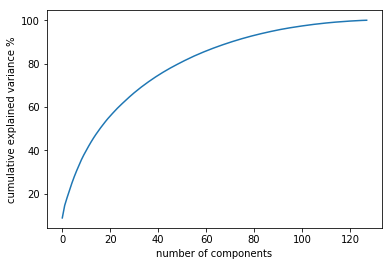

In [8]:
from sklearn.decomposition import PCA
X = reduced_df.iloc[:,:-1]
pca = PCA(n_components=128)
pca.fit(X)
#print(pca.explained_variance_ratio_)  
#print(pca.singular_values_)  
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance %');

### Comparing PCA and LDA
We are using are 3 commonly ocurring characters D,R,S to visualize the transformations of LDA and PCA on our dataset. The plot clearly demonstrate LDA is capable of reducing number of features while providing maximum separability.

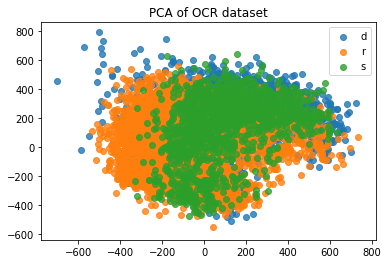

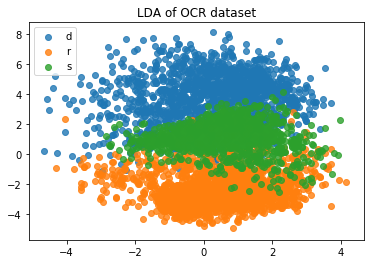

In [11]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


unique_label2=["d","r","s"]
X = pixel_df.iloc[:,:-1]
y = pixel_df.iloc[:,-1]
target_names = unique_labels

pca = PCA(n_components=25)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=25)
X_r2 = lda.fit(X, y).transform(X)

plt.figure()
for i, target_name in zip(unique_label2, unique_label2):
    plt.scatter(X_r[y == i,0], X_r[y == i,1], alpha=.8,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of OCR dataset')

plt.figure()
for i, target_name in zip(unique_label2, unique_label2):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of OCR dataset')

plt.show()

### visualize sample distribution by label in smaller subset

In [12]:
#print("Shape of Smaller Dataset")reduced_df.shape
#reduced_df.groupby('label').label.count()

### Data Preprocessing 

In [97]:
from sklearn.preprocessing import StandardScaler
reduced_df.iloc[:,:-1]= StandardScaler().fit_transform(reduced_df.iloc[:,:-1])

In [98]:
print("The shape is ",reduced_df_scaled.shape)

The shape is  (5000, 129)


### Train Test Split- Ratio
Train= 80%
Test= 20%

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(reduced_df.iloc[:,:-1], reduced_df.iloc[:,-1] , test_size=0.20)

In [101]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
import timeit
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Nearest Neighbors", "Linear SVM","Random Forest", "AdaBoost","Neural Net","Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    RandomForestClassifier(n_estimators=50, n_jobs=-1),
    AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=100),
    MLPClassifier(alpha=1),
    GaussianNB()]


# iterate over classifiers
for name, clf in zip(names, classifiers):
    start = timeit.default_timer()
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    stop = timeit.default_timer()
    print('Run Time for {} is {} sec'.format(name, stop - start))
    print("Accuracy for {} is {}%\n".format(name,score*100))
    

Run Time for Nearest Neighbors is 260.6110159108257 sec
Accuracy for Nearest Neighbors is 81.93845268909979%

Run Time for Linear SVM is 314.03545028642066 sec
Accuracy for Linear SVM is 83.15597737513181%

Run Time for Random Forest is 4.223385343052541 sec
Accuracy for Random Forest is 86.04160674911321%

Run Time for AdaBoost is 111.18577626483693 sec
Accuracy for AdaBoost is 27.22653628607037%

Run Time for Neural Net is 70.33599746829486 sec
Accuracy for Neural Net is 86.51136036813345%

Run Time for Naive Bayes is 3.5292730542328172 sec
Accuracy for Naive Bayes is 35.40408398044291%



## Running models with LDA

In [102]:
lda = LinearDiscriminantAnalysis()
X_LDA = lda.fit(reduced_df.iloc[:,:-1], reduced_df.iloc[:,-1]).transform(reduced_df.iloc[:,:-1])

#train-test Split
X_LDA_train, X_LDA_test, y_train, y_test = train_test_split(X_LDA, reduced_df.iloc[:,-1] , test_size=0.20)

In [103]:
names = ["Nearest Neighbors", "Linear SVM","Random Forest", "AdaBoost","Neural Net","Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    RandomForestClassifier(n_estimators=50, n_jobs=-1),
    AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=100),
    MLPClassifier(alpha=1),
    GaussianNB()]


# iterate over classifiers
for name, clf in zip(names, classifiers):
    start = timeit.default_timer()
    clf.fit(X_LDA_train, y_train)
    score = clf.score(X_LDA_test, y_test)
    stop = timeit.default_timer()
    print('Run Time for {} on LDA transformed data is {} sec'.format(name, stop - start))
    print("Accuracy for {} on LDA transformed data is {}%\n".format(name,score*100))
    

Run Time for Nearest Neighbors on LDA transformed data is 68.09778796542014 sec
Accuracy for Nearest Neighbors on LDA transformed data is 85.18838078803567%

Run Time for Linear SVM on LDA transformed data is 101.63858455446052 sec
Accuracy for Linear SVM on LDA transformed data is 80.37580289521618%

Run Time for Random Forest on LDA transformed data is 7.590164838807141 sec
Accuracy for Random Forest on LDA transformed data is 83.75035950532069%

Run Time for AdaBoost on LDA transformed data is 260.42075998195287 sec
Accuracy for AdaBoost on LDA transformed data is 29.699932892340144%

Run Time for Neural Net on LDA transformed data is 72.53027076842818 sec
Accuracy for Neural Net on LDA transformed data is 82.28357779695139%

Run Time for Naive Bayes on LDA transformed data is 1.2138799022382045 sec
Accuracy for Naive Bayes on LDA transformed data is 71.54635221934618%



## Convolutional Neural Network

In [106]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import keras.backend as K
K.set_image_data_format('channels_last')
from keras.utils import to_categorical


#### Reshaping 128 dimensional input data to 16 X 8 matrix
&
#### Converting each lable to One Hot Encoded Dummy vector of 26 dimension

In [182]:
#reshape dataframe for CNN
vector=[]
for i in range(len(pixels)):
    temp=np.array(pixels[i]).reshape(16,8)
    vector.append(temp)
from sklearn.preprocessing import LabelEncoder
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(labels)
encoded_Y = encoder.transform(labels)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = to_categorical(encoded_Y)

Shape is (m X h X w X n_c)
#### m: No. of Samples, h= Hieght of the Image, w= Width of image, n_c= Number of channels in the image (RGB=3, Grayscale=1)

In [108]:
data_orig=np.array(vector)
data_orig.shape

(52152, 16, 8)

Train Test split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(data_orig, dummy_y , test_size=0.20)

In [110]:
y_train.shape

(41721, 26)

In [111]:
# appending the channel dimension
y_train=np.array(y_train).reshape(len(y_train),26)
y_test=np.array(y_test).reshape(len(y_test),26)
X_train=X_train.reshape(len(X_train),16,8,1)

X_test=X_test.reshape(len(X_test),16,8,1)


### Final Shapes

In [112]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 41721
number of test examples = 10431
X_train shape: (41721, 16, 8, 1)
Y_train shape: (41721, 26)
X_test shape: (10431, 16, 8, 1)
Y_test shape: (10431, 26)


In [116]:
def OCR_model(input_shape):
    """
    CNN model for OCR
    
    Arguments:
    input_shape-shape of the images
    output:
    model -- a Model() instance in Keras
    """
    #taking input
    X_input= Input(input_shape)
    #Doing Same padding to prevent shrinking of images
    X= ZeroPadding2D((3,3))(X_input)
    
    #convolving 32, 7X7 filters on the input image 
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    #Applying batch Normalization on the features obtained
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    #applying ReLu non linearity
    X = Activation('relu')(X)

    #Applyinh Max pooling
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # Flatenning the image
    X = Flatten()(X)
    
    #Runiing a Fully Connected Deep Neural Network with 26 output nodes
    X = Dense(26, activation='sigmoid', name='fc')(X)

    # Create model.
    model = Model(inputs = X_input, outputs = X, name='OCR_Model')

    return model

In [117]:
#initializing model
OCR_Model = OCR_model((16,8,1))


In [118]:
#Configuring the model 
OCR_Model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=["accuracy"])


In [119]:
#training the model
OCR_Model.fit(x=X_train, y=y_train,epochs=40, batch_size=50)

Epoch 1/40
41721/41721 [==============================] - 55s 1ms/step - loss: 0.7864 - acc: 0.7763
Epoch 2/40
41721/41721 [==============================] - 30s 712us/step - loss: 0.4372 - acc: 0.8689
Epoch 3/40
41721/41721 [==============================] - 25s 590us/step - loss: 0.3699 - acc: 0.8881
Epoch 4/40
41721/41721 [==============================] - 27s 641us/step - loss: 0.3294 - acc: 0.8990
Epoch 5/40
41721/41721 [==============================] - 27s 656us/step - loss: 0.2978 - acc: 0.9059
Epoch 6/40
41721/41721 [==============================] - 57s 1ms/step - loss: 0.2811 - acc: 0.9111
Epoch 7/40
41721/41721 [==============================] - 21s 506us/step - loss: 0.2633 - acc: 0.9150
Epoch 8/40
41721/41721 [==============================] - 21s 499us/step - loss: 0.2464 - acc: 0.9198
Epoch 9/40
41721/41721 [==============================] - 25s 588us/step - loss: 0.2327 - acc: 0.9258
Epoch 10/40
41721/41721 [==============================] - 61s 1ms/step - loss: 0.2226

## Model Summary

In [120]:
OCR_Model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 16, 8, 1)          0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 22, 14, 1)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 16, 8, 32)         1600      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 16, 8, 32)         128       
_________________________________________________________________
activation_3 (Activation)    (None, 16, 8, 32)         0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 8, 4, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
__________

## Accuracy on Test Set

In [124]:
### Evaluating the code
preds = OCR_Model.evaluate(X_test,y_test)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

10431/10431 [==============================] - 10s 989us/step

Loss = 0.4382480259850091
Test Accuracy = 0.8972294123400641


## Plotting Training Errors

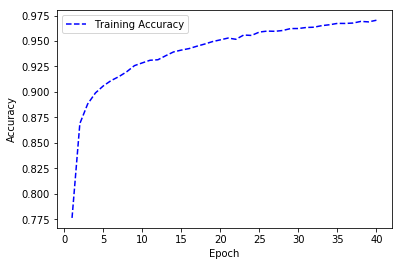

In [150]:
training_acc=OCR_Model.history.history['acc']
# Create count of the number of epochs
epoch_count = range(1, len(training_acc) + 1)

# Visualize loss history
plt.plot(epoch_count, training_acc, 'b--')
plt.legend(['Training Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

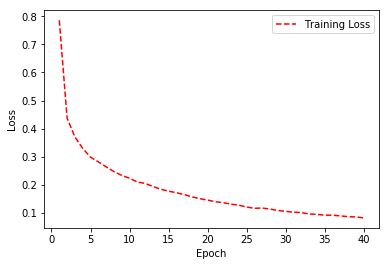

In [148]:
training_loss=OCR_Model.history.history['loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

## Confusion Matrix

In [166]:
#predict first 4 images in the test set
y_hat=OCR_Model.predict(X_test)

In [253]:
def original_labels(array,names):
    orig_label=[]
    for i in range(array.shape[0]):
        lab=names[array[i]==max(array[i])]
        orig_label.append(lab)
    return orig_label



In [255]:
orig_pred=original_labels(y_hat,unique_labels)

In [256]:
orig_test=original_labels(y_test,unique_labels)

In [257]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test, orig_pred, labels)

In [275]:
pd.set_option('display.max_columns', 26,'display.max_rows', 26)
CM=pd.DataFrame(cm)
CM.columns=unique_labels
CM.index=unique_labels

Text(0.5,1,'Confusion Matrix')

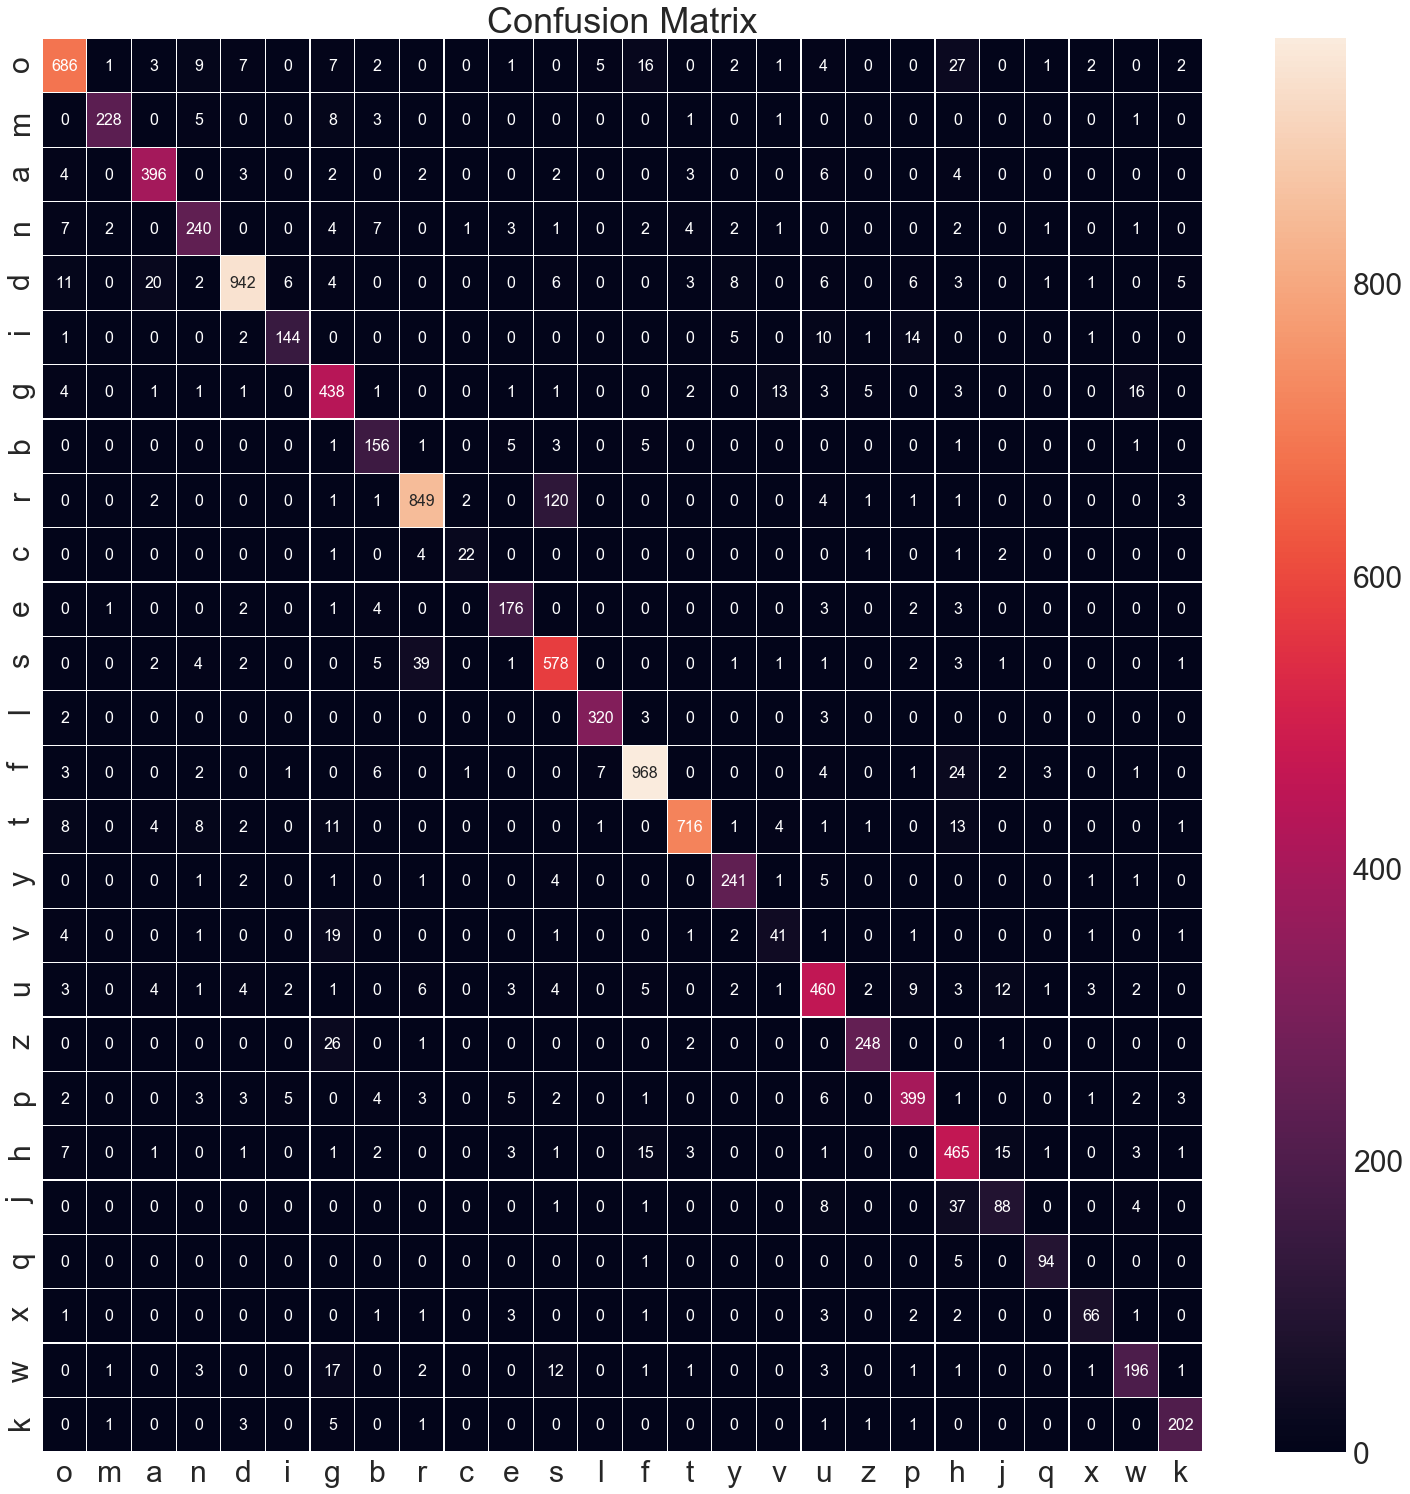

In [314]:
import seaborn as sn
plt.figure(figsize = (26,26))
sn.set(font_scale=3)
sn.heatmap(df_cm,annot=True, fmt="d",linewidths=.2,annot_kws={"size": 16}).set_title("Confusion Matrix")

## Conclusion

In [312]:
print("Our CNN model predicted {} out of {} samples correctly".format(cm.trace(),len(orig_test)))

Our CNN model predicted 9359 out of 10431 samples correctly


In [313]:
print("Our Final Accuracy is {}%".format(cm.trace()/len(orig_test) * 100))

Our Final Accuracy is 89.72294123286359%
